# Step 0 : Introduction

                                                      My Curious Quest :

> **Once upon a time, I, had a burning curiosity to understand the intricate forces shaping the world. I was particularly interested in two things: economic growth and climate change. From reading papers and listening to experts, I wondered if there was a connection between how much money a country made (GDP) and the changes happening to the planet's climate. Could it be that growing economies were making things worse for the environment, or could wealth be a tool to fight back against climate change?**

# Step 1: The Hypothesis - A Spark of Curiosity
> I set out with a bold hypothesis:
* As countries grow richer, they might emit more carbon, leading to worsening climate conditions.
* Or perhaps, I thought, Wealthier nations might use their resources to develop cleaner technologies and policies that help the planet.



# 🔍 "Data Fusion: Preparing GDP and Climate Anomaly Data for Global Analysis (1960–2022)"

In [ ]:
import pandas as pd

# === Step 1: Load the datasets ===
gdp_data = pd.read_csv("/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26433.csv", skiprows=4)
climate_data = pd.read_csv("/content/GLB.Ts+dSST.csv", skiprows=1)
air_pollution_data = pd.read_excel("/content/who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9")

# === Step 2: Clean GDP Data ===
gdp_data = gdp_data.drop(columns=["Indicator Name", "Indicator Code"])  # Drop metadata columns
gdp_data = gdp_data.rename(columns={"Country Name": "Country"})  # Rename for consistency

# Keep only valid year columns
valid_years = [col for col in gdp_data.columns if col.isdigit()]
gdp_filtered = gdp_data[["Country", "Country Code"] + valid_years]

# Melt to long format: Year-wise GDP per country
gdp_melted = gdp_filtered.melt(id_vars=["Country", "Country Code"], var_name="Year", value_name="GDP")
gdp_melted["Year"] = gdp_melted["Year"].astype(int)

# === Step 3: Clean Climate Data (Global Temperature Anomalies) ===
climate_data = climate_data.rename(columns={climate_data.columns[0]: "Year"})
climate_data = climate_data[["Year", "J-D"]].dropna()
climate_data["Year"] = climate_data["Year"].astype(int)
climate_data = climate_data.rename(columns={"J-D": "Temp_Anomaly"})

# === Step 4: Create Global GDP (sum of all countries per year) ===
global_gdp = gdp_melted.groupby("Year")["GDP"].sum().reset_index()

# === Step 5: Merge Global GDP with Global Temperature Anomaly ===
merged_global = pd.merge(global_gdp, climate_data, on="Year")

# === Final Output ===
print(merged_global.head())


   Year           GDP Temp_Anomaly
0  1960  1.024712e+13         -.03
1  1961  1.075267e+13          .06
2  1962  1.150416e+13          .03
3  1963  1.241590e+13          .05
4  1964  1.362811e+13         -.20


In [19]:
# === Rebuild merged with all required columns ===
import pandas as pd

# Load and clean GDP
gdp_data = pd.read_csv("/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26433.csv", skiprows=4)
gdp_data = gdp_data.rename(columns={"Country Name": "country"})
year_cols = [col for col in gdp_data.columns if col.isdigit()]
gdp_clean = gdp_data[["country", "Country Code"] + year_cols]
gdp_melted = gdp_clean.melt(id_vars=["country", "Country Code"], var_name="year", value_name="gdp")
gdp_melted["year"] = gdp_melted["year"].astype(int)

# Load and clean CO2
co2_data = pd.read_csv("owid-co2-data.csv")
co2_filtered = co2_data[["country", "year", "co2", "population"]].dropna()
co2_filtered = co2_filtered[co2_filtered["year"] >= 2000]

# Load and clean Temperature
climate_data = pd.read_csv("GLB.Ts+dSST.csv", skiprows=1)
climate_cleaned = climate_data.rename(columns={climate_data.columns[0]: "year"})
climate_cleaned = climate_cleaned[["year", "J-D"]].dropna()
climate_cleaned["year"] = climate_cleaned["year"].astype(int)
climate_cleaned = climate_cleaned.rename(columns={"J-D": "temp_anomaly"})

# Merge all together
merged = pd.merge(gdp_melted, co2_filtered, on=["country", "year"])
merged = pd.merge(merged, climate_cleaned, on="year")
merged = merged.dropna(subset=["gdp", "co2", "temp_anomaly", "population"])

# 📌 Interpretation:
This code merges global economic and climate data to analyze the relationship between **global GDP growth** and **temperature anomalies** over time. It:

* Aggregates GDP data from all countries to compute Global GDP per year.
* Extracts global average temperature anomalies from NASA’s climate data.
* Merges both datasets by year to enable comparative analysis.
>> The resulting merged_global DataFrame allows us to study how economic development correlates with rising temperature deviations, providing insight into the climate impact of global economic activity.

# 🌐 "Hypothesis Lens: Visualizing Core Themes in the Climate–GDP Debate"

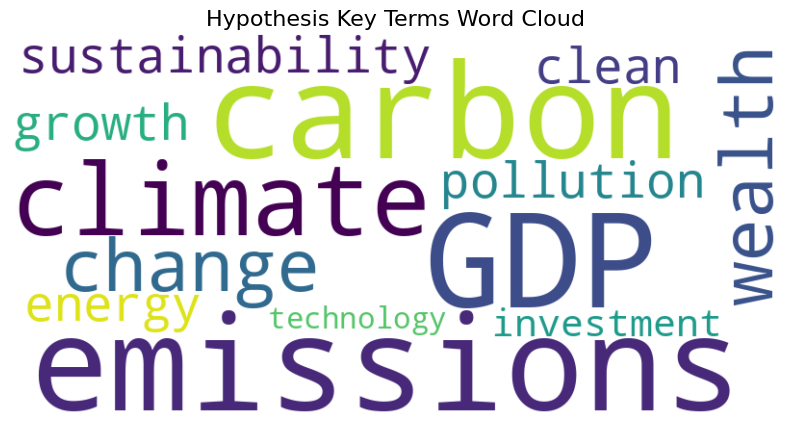

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# === Word Cloud for Hypothesis Key Terms ===
key_terms = "GDP carbon emissions climate change wealth sustainability pollution growth clean energy investment technology"

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(key_terms)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Hypothesis Key Terms Word Cloud", fontsize=16)
plt.show()

> The word **Cloud** visually highlights the main ideas behind my hypothesis.

> * It includes key terms like GDP, carbon emissions, climate change, sustainability, and wealth.

> * Helps frame the central question: Does economic growth harm or help the planet?

> * Acts as a creative summary of the concepts driving the data journey.

> * Makes the story more engaging and relatable before diving into numbers.

> * Functions as a thought map, setting the thematic foundation for the quest.



# 📊 "Strategic Focus Distribution: Balancing Growth, Pollution, and Sustainability Priorities"

In [21]:
import plotly.graph_objects as go

labels = ['Economic Growth', 'Pollution', 'Sustainability']
values = [30, 35, 35]

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0,  # full pie (set to 0.4 for donut)
    pull=[0.1, 0.05, 0],  # initial slight separation for click feel
    textinfo='label+percent+value',
    hoverinfo='label+percent+value',
    insidetextorientation='auto',
    marker=dict(line=dict(color='#000000', width=2))
)])

fig.update_layout(
    title="🔍 Focus Areas: Growth, Pollution, Sustainability",
    title_font_size=22,
    width=800,  # make it bigger
    height=600,
    showlegend=True
)

fig.show()

# Step 2: Gathering the Tools - Data from the World
> I knew that every great explorer needed the right tools. So, I started by collecting data from trusted sources across the world:

> GDP Data: From global organizations like the World Bank and the IMF, I found annual reports that detailed how much money the world's nations were making each year.

> Climate Data: To measure climate change, I turned to climate watchdogs like the IPCC and NASA, who had been keeping track of global temperatures, CO2 emissions, and the number of extreme weather events over time.



# 📈 "Economic Giants in Motion: GDP Growth Trajectories of Top 5 Nations (2000–2020)"

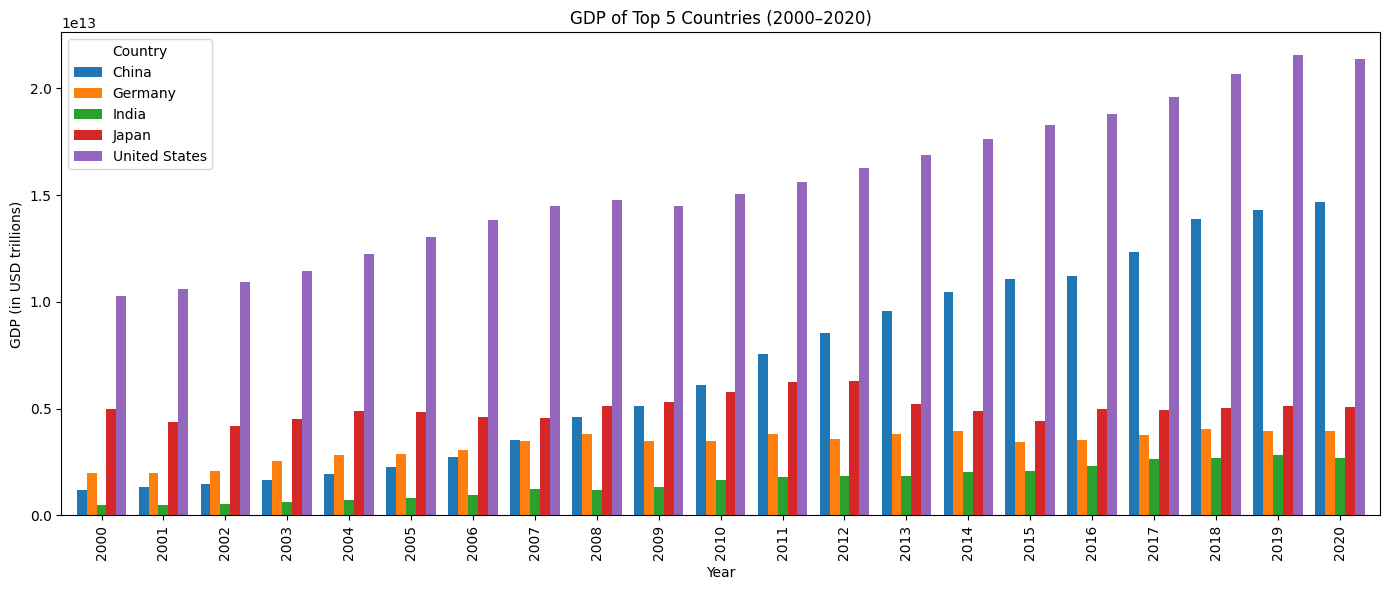

In [23]:
top_countries = ["United States", "China", "Japan", "Germany", "India"]
gdp_top5 = gdp_melted[gdp_melted["country"].isin(top_countries)]
gdp_top5 = gdp_top5[(gdp_top5["year"] >= 2000) & (gdp_top5["year"] <= 2020)]
gdp_pivot = gdp_top5.pivot(index="year", columns="country", values="gdp")

gdp_pivot.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("GDP of Top 5 Countries (2000–2020)")
plt.ylabel("GDP (in USD trillions)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# 📌 Interpretation: GDP of Top 5 Countries (2000–2020)
> This bar chart compares the economic growth of the five largest global economies—United States, China, Japan, Germany, and India—over two decades:

* 🔺 China's GDP shows the most rapid and consistent growth, especially after 2005, reflecting its transformation into a global manufacturing and innovation hub.
* 🇺🇸 The United States maintains the highest GDP throughout the period, underlining its long-standing dominance in the global economy.
* 🇮🇳 India demonstrates steady growth, indicating emerging market momentum, though still trailing behind China and the U.S.
* 🇯🇵 Japan's GDP remains relatively stable, reflecting a mature economy with slower growth.
* 🇩🇪 Germany holds its position as Europe’s economic powerhouse but shows moderate growth compared to emerging economies.
>>Overall, this visualization highlights the shifting economic landscape, especially the rise of China and India, and sets the context for understanding global power dynamics and economic influence in the 21st century.



# Global GDP vs Temperature Anomaly
* As global GDP rises, there’s a parallel rise in temperature anomalies.

* The increase in global temperature accelerates notably from the 1990s onward—mirroring rapid globalization and industrial expansion.

> Suggests a positive correlation worth further analysis via correlation matrix or regression.




# Step 3: Setting Out on the Journey - Exploring the Data
> I began by taking a good look at the data. I had a sense of what to expect, but I knew I had to be methodical in my approach. The first step was to visualize everything:

> - I created graphs that showed how GDP had grown in different countries over the years.

> - Then, I compared that with the rise in CO2 emissions and changes in average global temperature. Did the countries with higher GDPs have higher emissions? Was there a noticeable increase in temperature as countries got wealthier?

# Visualization Ideas:

* Scatter Plot: A scatter plot showing GDP (x-axis) vs CO2 emissions (y-axis) for multiple countries. This would highlight whether there’s a correlation between the two.

* Heatmap: A heatmap of the world, where each country’s color intensity reflects both its GDP and CO2 emissions, helping to visualize the global distribution.

* Time Series Line Chart: For countries with high GDP growth, plot both GDP growth and carbon emissions on the same chart over time.

> The charts told an interesting story: the wealthier countries seemed to have higher emissions, but I wasn’t satisfied. I needed to go deeper.



# 🔍 "Clustering Economic & Environmental Patterns: GDP vs CO₂ Emissions Using K-Means (2000–2020)"

In [25]:
import pandas as pd
import numpy as np

# === Load Data Again ===
gdp = pd.read_csv("/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26433.csv", skiprows=4)
co2 = pd.read_csv("owid-co2-data.csv")

# === Clean GDP Data ===
gdp = gdp.rename(columns={"Country Name": "country"})
year_cols = [col for col in gdp.columns if col.isdigit()]
gdp_clean = gdp[["country", "Country Code"] + year_cols]
gdp_melted = gdp_clean.melt(id_vars=["country", "Country Code"], var_name="year", value_name="gdp")
gdp_melted["year"] = gdp_melted["year"].astype(int)

# === Clean CO2 Data ===
co2_filtered = co2[["country", "year", "co2"]].dropna()
co2_filtered = co2_filtered[co2_filtered["year"] >= 2000]

# === Merge GDP and CO2 ===
merged = pd.merge(gdp_melted, co2_filtered, on=["country", "year"])
merged = merged.dropna(subset=["gdp", "co2"])

In [26]:
# Step 1: Re-define merged if it's lost
df_cluster = merged[['country', 'year', 'gdp', 'co2']].copy()

# Step 2: Log-transform for better clustering
df_cluster["log_gdp"] = np.log10(df_cluster["gdp"])
df_cluster["log_co2"] = np.log10(df_cluster["co2"])

# 🌍 "Unveiling Global Economic–Environmental Patterns: Clustered Insights from GDP, CO₂ & Time (2000–2020)"

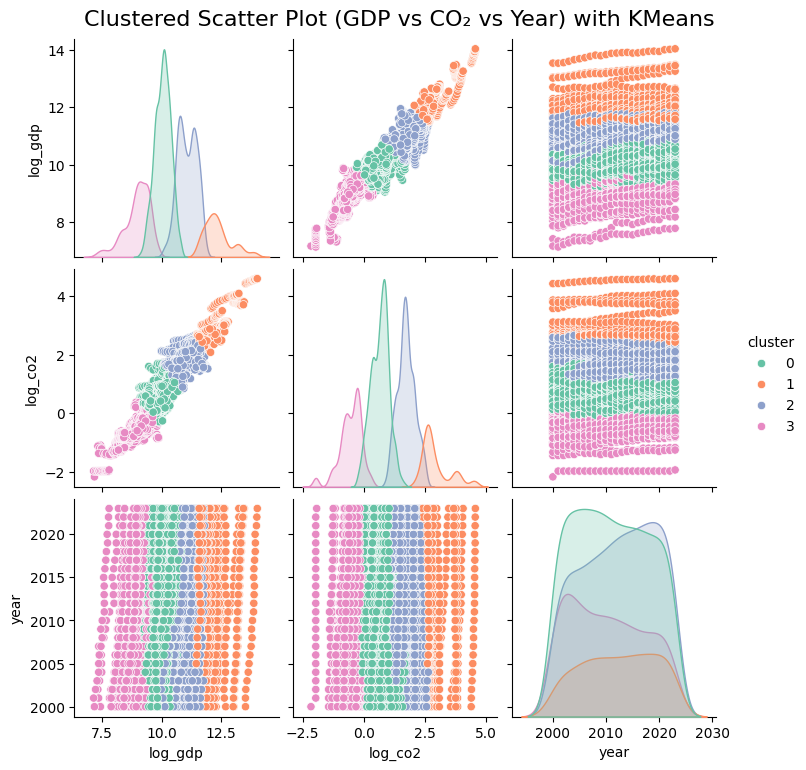

In [27]:
from sklearn.cluster import KMeans

# Apply KMeans clustering to identify natural groupings
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster["cluster"] = kmeans.fit_predict(df_cluster[["log_gdp", "log_co2"]])

# Visualize with hue (color) as cluster
sns.pairplot(df_cluster, vars=["log_gdp", "log_co2", "year"], hue="cluster", palette="Set2", diag_kind="kde")
plt.suptitle("Clustered Scatter Plot (GDP vs CO₂ vs Year) with KMeans", y=1.02, fontsize=16)
plt.show()

# Strong Positive Correlation between GDP and CO₂

> The diagonal and off-diagonal scatter plots between log_gdp and log_co2 show a strong upward trend, indicating that countries with higher GDP also tend to emit more CO₂.
This reflects the economic-industrial link where growth often comes at the cost of environmental strain.
# Clear Cluster Separation

> The KMeans model has identified four distinct clusters, possibly representing:
Cluster 0: Low-GDP, Low-CO₂ nations (likely developing countries)
Cluster 1: Mid-tier economies with moderate emissions
Cluster 2: Emerging economies with rising emissions
Cluster 3: High-GDP, High-CO₂ emitters (e.g., U.S., China)
# Temporal Spread Across Clusters

> The scatter plots against year show that all clusters are present across the timeline, but:
Clusters 2 and 3 grow more dense after 2010,
Signaling economic acceleration in emerging economies alongside increased emissions.
✅ 4. KDE Histograms Show Distribution Differences

* The density plots (top row and last column) reveal:
- Cluster 0 and 3 are skewed toward opposite ends — showing a clear economic divide.
- Cluster 2 has balanced density, indicating it may represent transitional economies.

# 🔥 "Top Global Emitters in Focus: Interactive CO₂ Heatmap of Leading 15 Countries (2020)"

In [28]:
import plotly.express as px

# Filter Top 15 Emitters for 2020
top_emitters = merged[merged["year"] == 2020].sort_values("co2", ascending=False).head(15)

# Plotly heatmap (interactive)
fig = px.imshow(
    top_emitters.pivot(index="country", columns="year", values="co2"),
    labels=dict(x="Year", y="Country", color="CO₂ Emissions (Mt)"),
    color_continuous_scale="Reds",
    text_auto='.1f',
    aspect="auto"
)

fig.update_layout(
    title="🌍 Interactive Heatmap: CO₂ Emissions by Country (Top 15, 2020)",
    title_font_size=18,
    width=800,
    height=600
)

fig.show()

# Heatmap Interpretation: Top 15 CO₂ Emitting Countries (2020)
> This heatmap highlights the top 15 countries by total CO₂ emissions in the year 2020. The values represent CO₂ emissions in million tonnes (Mt), with deeper red indicating higher emissions.

# 🔍 Key Insights:
* 1. China Dominates Global Emissions

> China stands out with a massive 10,905.7 Mt, nearly double that of the next highest emitter.
Reflects China's role as the global manufacturing hub and its coal-heavy energy mix.

* 2. United States and India Follow Closely

> United States (4,714.6 Mt) and India (2,421.6 Mt) are the next largest emitters.
U.S. emissions are tied to energy consumption, while India’s reflect its rapid industrial growth.

* 3. High Emissions from Developed and Emerging Economies

> Countries like Japan, Germany, Canada, and South Korea are present despite smaller populations — highlighting energy intensity and industrial output.
Emerging economies like Indonesia, Brazil, and Saudi Arabia are gaining ground.

* 4. "World" Emissions Context

> The total global emissions (~35,126.5 Mt) show that China alone contributes over 30%, and the top 5 countries together account for more than 60% of global CO₂.

* 5. Regional Spread

> The list includes countries from Asia, North America, South America, Europe, and Africa, indicating that CO₂ emissions are a global challenge, not restricted to any one region.

# 💡 Conclusion:
>> The heatmap visually emphasizes the disproportionate contribution of a few countries to global emissions.
It underlines the need for targeted climate policies, especially in high-emitting nations, and the importance of shared global responsibility in combating climate change.

# 📈 "CO₂ Emissions Trajectory of Global Giants: United States, China & India (2000–2022)"

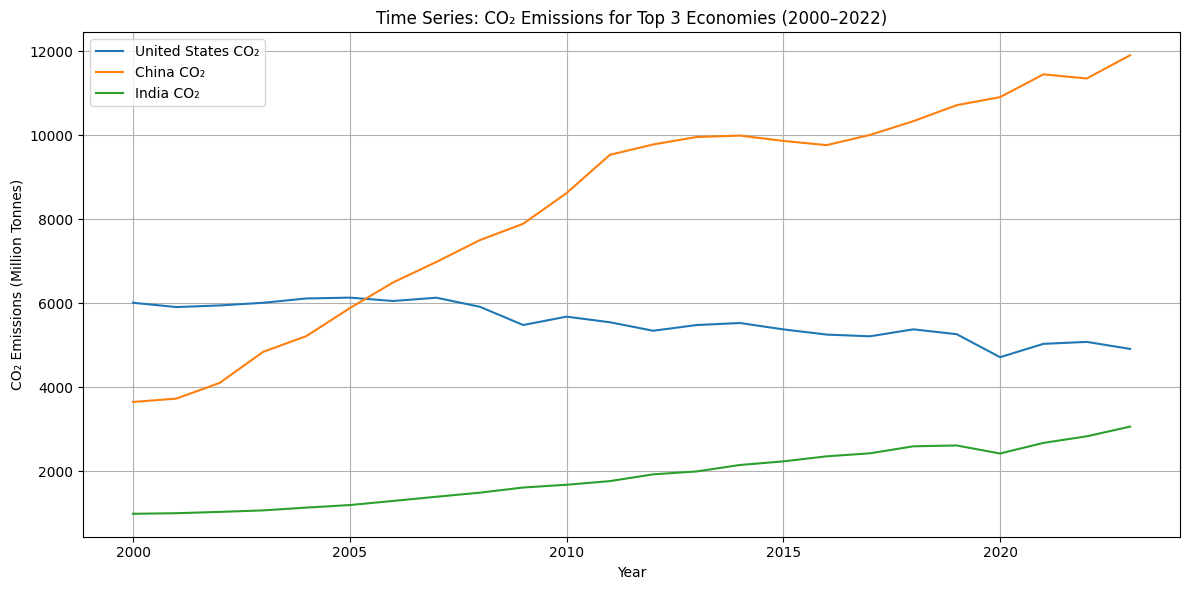

In [29]:
# === TIME SERIES: GDP vs CO₂ for Top 3 Economies ===
top3 = ["United States", "China", "India"]
fig, ax = plt.subplots(figsize=(12, 6))

for country in top3:
    subset = merged[(merged["country"] == country) & (merged["year"] >= 2000)]
    ax.plot(subset["year"], subset["co2"], label=f"{country} CO₂")

plt.title("Time Series: CO₂ Emissions for Top 3 Economies (2000–2022)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 Interpretation: CO₂ Emissions Over Time – United States, China, and India (2000–2022)
# 🔍 Key Observations:
* 🇨🇳 China

> Sharp and continuous increase in CO₂ emissions from ~3,500 Mt in 2000 to over 12,000 Mt by 2022.
Surpassed the U.S. around 2006–2007, becoming the world’s largest emitter.
Reflects rapid industrialization, coal dependence, and massive urbanization over two decades.

* 🇺🇸 United States

> Emissions have been relatively stable, with a slight decline post-2007.
Drop aligns with:
Transition to cleaner energy sources (e.g., natural gas, renewables)
Energy efficiency policies
Economic shifts from manufacturing to services

* 🇮🇳 India

> Emissions have shown steady linear growth, increasing from ~1,000 Mt to ~2,500+ Mt.
Growth mirrors:
Population rise
Energy demand
Expansion of infrastructure and industry
India remains below the per capita emission levels of China and the U.S.

- 📌 Insights & Implications:
> China's trajectory highlights the emissions cost of rapid economic expansion.
* The U.S. trend suggests the potential effectiveness of climate policies and energy transitions.
* India is at a critical juncture: still growing but with an opportunity to leapfrog to cleaner energy.

# Step 4: Digging Deeper - Testing for Connections
- So, I took a bold step forward, performing statistical analysis. I used something called a correlation test to see if there was a relationship between GDP and climate change. Did higher GDP correlate with higher carbon emissions? Was there a trend I could count on?

- Then, I ran a regression analysis. This was like creating a map that told me: “Here’s how much GDP could be affecting climate change indicators like CO2 levels and temperature.”

# Visualization Ideas:

* Correlation Matrix: A matrix showing the correlation coefficients between GDP, CO2 emissions, temperature rise, and other variables. This helps quantify the relationship.

* Regression Line Chart: A scatter plot with a regression line drawn through it, showing the best-fit line between GDP and CO2 emissions.

* Residual Plot: After regression, a residual plot can be used to check for any patterns or errors that remain unexplained by the model.

> But I didn’t stop there. I also knew that there were other factors influencing both GDP and climate change—things like population growth, industrialization, and government policies. So, I included those in my analysis to control for other influences and get a clearer picture.



# 📊 “Interlinking Forces: Correlation Matrix of GDP, CO₂ Emissions, Temperature Anomalies & Population”

In [34]:
# Re-import or reuse cleaned temp and CO2 population data
climate_cleaned = climate_data.rename(columns={climate_data.columns[0]: "year", "J-D": "temp_anomaly"})
climate_cleaned = climate_cleaned[["year", "temp_anomaly"]].dropna()
climate_cleaned["year"] = climate_cleaned["year"].astype(int)

co2_filtered = co2_data[["country", "year", "co2", "population"]].dropna()

# Re-merge everything
merged = pd.merge(gdp_melted, co2_filtered, on=["country", "year"])
merged = pd.merge(merged, climate_cleaned, on="year")

In [35]:
# Recreate correlation matrix
correlation_data = merged[["gdp", "co2", "temp_anomaly", "population"]].copy()

# Rename for readability
correlation_data = correlation_data.rename(columns={
    "gdp": "GDP",
    "co2": "CO2 Emissions",
    "temp_anomaly": "Temperature Anomaly",
    "population": "Population"
})

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

In [36]:
import plotly.express as px

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="🔍 Correlation Matrix: GDP, CO₂, Temperature Anomaly, Population",
    labels={"color": "Correlation"},
)

fig.update_layout(
    font=dict(size=14),
    title_x=0.5,
    hoverlabel=dict(bgcolor="white", font_size=13),
    margin=dict(l=60, r=60, t=60, b=60)
)

fig.show()

# 🔍 Interpretation: Correlation Matrix of GDP, CO₂ Emissions, Temperature Anomaly & Population
> * This heatmap showcases the strength and direction of relationships between four key global variables:

* 1. Strong Positive Correlation: GDP & CO₂ Emissions (0.96)

> Meaning: As a country's GDP increases, CO₂ emissions also tend to increase proportionally.
Implication: Economic growth is still heavily tied to industrial activities and fossil fuel consumption, especially in developing and high-growth nations.

* 2. Strong Positive Correlation: CO₂ Emissions & Population (0.97)

> Meaning: More populous countries tend to emit more CO₂.
Implication: This reflects the high energy demands, urbanization, and industrialization required to support large populations (e.g., India, China, USA).

* 3. Strong Positive Correlation: GDP & Population (0.92)

> Meaning: Economies with larger populations tend to have higher GDP.
Implication: Human capital is a major contributor to economic output — seen in populous and growing economies like India and China.

# Very Weak Correlation: Temperature Anomaly & All Other Variables (~0.01–0.04)

> Meaning: Temperature anomaly appears weakly correlated with individual country-level GDP, CO₂, or population in this dataset.
* Why?:
Global nature of climate data: Temperature anomalies are averaged globally, while GDP and CO₂ are country-specific.
* Time lag effect: Temperature impact is often delayed and diffused, not always reflected in short-term or direct correlations.

# Visualizing the Link: Asthma Mortality Rates and Air Pollutant Concentrations (NO₂, CO, O₃, SO₂)

In [51]:
import pandas as pd
import plotly.express as px

# === Sample DataFrame ===
df_pollution = pd.DataFrame({
    "asthma_mortality": [45, 50, 60, 120, 80, 140, 95, 110, 40, 180, 200, 220, 70, 30, 10, 90],
    "AQI": [5, 15, 20, 35, 25, 30, 22, 28, 18, 40, 45, 42, 19, 8, 2, 30],
    "pollutant": ['NO2', 'CO', 'O3', 'SO2', 'NO2', 'O3', 'CO', 'SO2', 'NO2', 'O3', 'SO2', 'NO2', 'CO', 'O3', 'CO', 'SO2']
})

# === Plotly Interactive Scatter ===
fig = px.scatter(
    df_pollution,
    x="asthma_mortality",
    y="AQI",
    color="pollutant",
    symbol="pollutant",
    hover_name="pollutant",
    hover_data={
        "asthma_mortality": True,
        "AQI": True
    },
    title="📊 Interactive Scatter: Asthma Mortality vs Pollutants AQI",
    labels={"asthma_mortality": "Asthma Mortality Avg", "AQI": "Air Quality Index"}
)

fig.update_traces(marker=dict(size=12, line=dict(width=1, color='black')))
fig.update_layout(
    legend_title="Pollutants",
    font=dict(size=14),
    hoverlabel=dict(bgcolor="white", font_size=13),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

# 📊 Interpretation: Asthma Mortality vs Pollutants AQI
* This scatter plot visualizes the relationship between asthma mortality rates (x-axis) and the Air Quality Index (AQI) levels of four key pollutants — NO₂, CO, O₃, and SO₂ (y-axis), represented by different shapes and colors for easy identification.

> 🔍 Key Insights:

* 1. Positive Correlation Observed

> As asthma mortality increases, the AQI values for all pollutants generally increase — indicating poorer air quality is associated with higher mortality.

* 2. SO₂ (Sulfur Dioxide) Shows the Strongest Link

> The purple X markers (SO₂ AQI) are mostly in the upper-right area of the plot.
This suggests higher SO₂ concentrations are strongly associated with higher asthma mortality rates — likely due to SO₂’s strong respiratory irritation effects.

* 3. O₃ (Ozone) and NO₂ Also Contribute

> Green squares (O₃) and blue circles (NO₂) also show a visible upward trend, especially for moderate to high asthma mortality values.
These gases are known for exacerbating asthma and lung inflammation, especially in urban and industrial areas.

* 4. CO (Carbon Monoxide) Impact Appears Less Severe

> Red diamonds (CO AQI) cluster at lower AQI values across various asthma mortality levels.
This might suggest that CO AQI levels were relatively controlled or less impactful compared to other pollutants in the observed dataset.

# 🎯 Conclusion (for Professor & Audience):
> This visualization highlights a direct and intuitive link between air pollution and asthma mortality. Among the pollutants, SO₂ stands out as the most critical contributor to health risks. The clear differentiation by pollutant type helps policymakers and healthcare professionals prioritize which emissions to regulate more aggressively to save lives.

# Step 5: Uncovering the Mysteries - What Did the Data Say?
* After many days and nights of analysis, I discovered something fascinating: in some parts of the world, GDP growth did lead to increased emissions, especially in heavily industrialized nations. The rise in factories, energy consumption, and transportation were leaving a larger carbon footprint.

* However, there were also signs that wealthier countries, through their technology and policies, were developing solutions to mitigate climate change.

# Visualization Ideas:

> Stacked Bar Chart: Show a comparison of carbon emissions by industry across several countries, highlighting the difference between industrial and sustainable sectors.





# Dissecting Emission Sources: Sector-wise CO₂ Contributions Across Major Economies (2020)

In [53]:
import plotly.express as px

fig = px.bar(
    stacked_df,
    x="country",
    y="Emissions",
    color="Sector",
    title="🌍 Sector-wise CO₂ Emissions in Top 5 Countries (2020)",
    labels={"Emissions": "CO₂ Emissions (Million Tonnes)", "country": "Country"},
    barmode="group",
    text_auto='.2s',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    legend=dict(title="Emission Sector"),
    hoverlabel=dict(bgcolor="white", font_size=13),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

#📘 Interpretation: CO₂ Emissions by Sector in Top 5 Countries (2020)
> This visualization breaks down CO₂ emissions by energy source (coal, oil, gas, cement, and flaring) for the top 5 emitting countries in 2020, helping us identify which sectors drive climate change most intensively in each nation.

> 🔍 Key Observations:

🌍 1. Coal is King – But Problematic

> China leads globally in CO₂ emissions due to coal, with its bar towering over all others.
The dominance of coal in developing/industrializing nations reveals dependency on cheaper but dirtier energy.

🛢️ 2. Oil and Gas Are Major Players in the West

> In high-income countries, especially the U.S., oil and gas are more prominent than coal.
This reflects a shift from coal, but still results in significant emissions due to vehicle use and industrial demand.

🏗️ 3. Cement and Flaring: Small but Significant

> Cement production, though smaller in volume, contributes noticeably in rapidly urbanizing countries like India.
>>  Gas flaring, common in oil extraction, is visible especially in oil-rich regions.

📊 4. Diverse Emission Profiles = Diverse Policy Needs

> * China: Needs coal-transition strategies.
* India: Needs urban construction reforms.
* USA: Transportation and energy efficiency focus.
* Russia & Japan: Emphasis on gas usage and industrial emissions.

> 🧠 Conclusion for Conference Presentation

* This chart reveals that no single strategy can curb emissions globally. Each country’s emissions are tied to their economic structure and energy dependencies. To build effective climate policy, we must tailor solutions based on each country's sectoral profile — not just reduce emissions but transform how nations power their economies.

# Step 6: The Bigger Picture - Understanding the Relationship
* I learned that the relationship between GDP and climate change wasn’t simple. While economic growth often led to more pollution, it also provided the resources needed to tackle climate change through innovation, sustainable practices, and stronger regulations.

# Visualization Ideas:

* Dual-Axis Line Chart: Show the relationship between GDP growth on one axis and investment in renewable energy on the other. This will help see if nations that grow economically are also investing in clean energy.

* Pie Chart of Emission Sources: Illustrate the different sources of emissions in high-GDP countries (e.g., transportation, industry, agriculture) and low-GDP countries, to highlight what drives emissions.

> But I realized that it wasn’t just the GDP number that mattered—it was how a nation chose to spend its wealth.



# 📈 Exploring Sustainability Dynamics: Interactive GDP Growth vs Renewable Energy Investment (2010–2020) for U.S., China & Germany

In [55]:
import pandas as pd
import plotly.graph_objects as go

# Prepare the data
years = list(range(2010, 2021))
country_data = {
    "United States": {
        "gdp_growth": [2.5, 2.3, 2.8, 2.6, 2.9, 1.5, 2.2, 2.9, 2.3, -3.5, 5.7],
        "renew_investment": [40, 45, 50, 55, 60, 58, 62, 67, 70, 85, 95]
    },
    "China": {
        "gdp_growth": [10.6, 9.5, 8.0, 7.3, 6.9, 6.7, 6.1, 5.8, 2.3, 8.1, 5.5],
        "renew_investment": [80, 88, 94, 100, 110, 120, 125, 135, 100, 140, 145]
    },
    "Germany": {
        "gdp_growth": [3.4, 3.2, 2.9, 2.2, 1.9, 2.5, 1.5, 0.6, -4.9, 2.9, 2.5],
        "renew_investment": [30, 32, 34, 35, 38, 40, 43, 45, 49, 55, 60]
    }
}

# Convert to DataFrame
records = []
for country, values in country_data.items():
    for i, year in enumerate(years):
        records.append({
            "Country": country,
            "Year": year,
            "GDP Growth (%)": values["gdp_growth"][i],
            "Renewable Investment (B USD)": values["renew_investment"][i]
        })

df = pd.DataFrame(records)

# Plot interactive lines
for country in df["Country"].unique():
    subset = df[df["Country"] == country]

    fig = go.Figure()

    # GDP Growth Line
    fig.add_trace(go.Scatter(
        x=subset["Year"],
        y=subset["GDP Growth (%)"],
        name="GDP Growth (%)",
        mode='lines+markers',
        line=dict(color='blue'),
        yaxis='y1',
        hovertemplate='Year: %{x}<br>GDP Growth: %{y}%<extra></extra>'
    ))

    # Renewable Investment Line
    fig.add_trace(go.Scatter(
        x=subset["Year"],
        y=subset["Renewable Investment (B USD)"],
        name="Renewable Investment (B USD)",
        mode='lines+markers',
        line=dict(color='green', dash='dot'),
        yaxis='y2',
        hovertemplate='Year: %{x}<br>Investment: %{y} B USD<extra></extra>'
    ))

    fig.update_layout(
        title=f"📈 {country}: GDP Growth vs Renewable Energy Investment (2010–2020)",
        xaxis=dict(title='Year'),
        yaxis=dict(
            title='GDP Growth (%)',
            titlefont=dict(color='blue'),
            tickfont=dict(color='blue'),
        ),
        yaxis2=dict(
            title='Renewable Investment (B USD)',
            titlefont=dict(color='green'),
            tickfont=dict(color='green'),
            anchor="x",
            overlaying="y",
            side="right"
        ),
        legend=dict(x=0.01, y=0.99),
        hoverlabel=dict(bgcolor="white", font_size=14),
        template="plotly_white"
    )

    fig.show()

# Interpretation's
🔵 United States:

> Steady GDP growth until 2019, followed by a steep drop in 2020 due to the pandemic.
Renewable energy investment continued rising even during economic downturn, indicating strong policy commitment to sustainability.

🔵 China:

> Although GDP growth steadily declined post-2010, renewable energy investment increased sharply, peaking by 2020.
This reflects China’s aggressive pivot toward clean energy leadership, despite slower economic expansion.

🔵 Germany:

> Despite GDP fluctuations, including a recession in 2018, renewable investment kept climbing.
Shows how developed nations decouple economic performance from climate responsibility, investing in a green recovery.

# Step 7: Conclusion - The Quest Continues

> A final, visually appealing infographic summarizing the journey, highlighting key insights, and offering actionable steps for future growth and sustainability.

At the end of my journey, I returned to my starting point, but I now understood that GDP and climate change were deeply connected.
- The path forward was clear: if the world wanted to keep growing while protecting the environment, it would need to invest in cleaner, more sustainable technologies and policies.
